In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

In [4]:
(train, test), info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [5]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255., label

train = train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
train = train.cache()
train = train.shuffle(info.splits['train'].num_examples)
train = train.batch(128)
train = train.prefetch(tf.data.AUTOTUNE)

test = test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
test = test.batch(128)
test = test.cache()
test = test.prefetch(tf.data.AUTOTUNE)

In [6]:
for example in train.take(1):
    image, label = example[0], example[1]

Number: 9



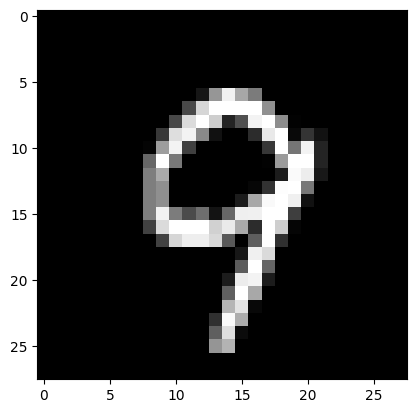

In [7]:
i = 5
print(f"Number: {int(label[i])}\n")

plt.imshow(image[i], cmap='gray')
plt.show()

In [8]:
num_classes = 10

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
from tensorflow.keras.callbacks import EarlyStopping

earlystopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

epochs = 15
history = model.fit(train,
                    epochs=epochs,
                    validation_data=test,
                    callbacks=[earlystopping])


Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - loss: 0.5373 - sparse_categorical_accuracy: 0.8203 - val_loss: 0.0498 - val_sparse_categorical_accuracy: 0.9840
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0843 - sparse_categorical_accuracy: 0.9749 - val_loss: 0.0407 - val_sparse_categorical_accuracy: 0.9868
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0566 - sparse_categorical_accuracy: 0.9832 - val_loss: 0.0258 - val_sparse_categorical_accuracy: 0.9919
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0441 - sparse_categorical_accuracy: 0.9875 - val_loss: 0.0213 - val_sparse_categorical_accuracy: 0.9925
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0406 - sparse_categorical_accuracy: 0.9885 - val_loss: 0.0216 - val_sparse_categorical_accuracy: 0.9932
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0343 - sparse_categorical_accuracy: 0.9897 - val_loss: 0.0198 - val_sparse_categorical_accuracy: 0.9942
Ep

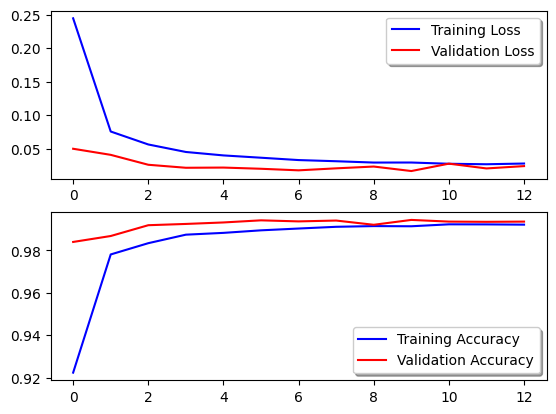

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['sparse_categorical_accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_sparse_categorical_accuracy'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [11]:
model.save('Hand Written recognition.keras')

Current working directory: /content
Model path: /content/Hand Written recognition.keras
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


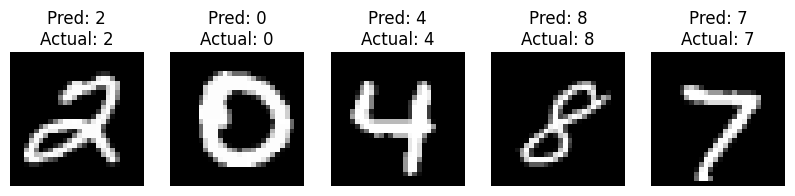

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import os

current_directory = os.getcwd()
print("Current working directory:", current_directory)

model_path = os.path.join(current_directory, 'Hand Written recognition.keras')
print("Model path:", model_path)

model = load_model(model_path)

predictions = model.predict(test)

predicted_labels = np.argmax(predictions, axis=1)

for images, labels in test.take(1):
    images, labels = images.numpy(), labels.numpy()

    plt.figure(figsize=(10, 5))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(f"Pred: {predicted_labels[i]}\nActual: {labels[i]}")
        plt.axis('off')
    plt.show()

Current working directory: /content
Model path: /content/Hand Written recognition.keras


Saving three.jpg to three.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


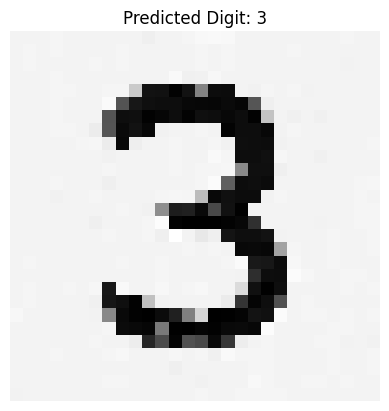

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import os
import cv2
from google.colab import files

current_directory = os.getcwd()
print("Current working directory:", current_directory)

model_path = os.path.join(current_directory, 'Hand Written recognition.keras')
print("Model path:", model_path)

model = load_model(model_path)

def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        raise ValueError(f"Could not load image from path: {image_path}")

    img = cv2.resize(img, (28, 28))
    img = img / 255.0
    img = img.reshape(1, 28, 28, 1)
    return img

uploaded = files.upload()

image_filename = list(uploaded.keys())[0]

image_path = os.path.join(current_directory, image_filename)

preprocessed_image = preprocess_image(image_path)

prediction = model.predict(preprocessed_image)
predicted_label = np.argmax(prediction)

plt.imshow(preprocessed_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {predicted_label}")
plt.axis('off')
plt.show()